In [53]:
##### Python Script to Scrap corono cases data in India from website and save the data in csv fiels and represent the data visually by ising
## seaborn libraries

In [52]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

In [2]:
page = 'https://www.mygov.in/corona-data/covid19-statewise-status'
res = requests.get(page)
source = res.text
soup = BeautifulSoup(source,'html.parser')

In [3]:
#### Overall Stats of cases headers
head_list = []
head = soup.find_all('div',class_='field-label')[0:6]
for x in head:
    head_list.append(x.text)

In [4]:
### Overall Stats of cases data
cont_list = []
for z in soup.find_all('div',class_='field-item even')[0:6]:
    cont_list.append(z.text)

In [5]:
#### All States List
states_List = []
head = soup.find_all('div',class_='field-label')[12:16]
for x in head:
    states_List.append(x.text)

In [6]:
temp = []
for z in soup.find_all('div',class_='field-item even')[8:500]:
    temp.append(z.text.strip())
    


In [7]:
clean = []
for x in temp:
    clean.append(list(x.split('State Name')))

In [8]:
clean_data = []
for a in clean:
    clean_data.append(a[0])

In [9]:
samp_data = []
samp_data = ([x for x in clean_data if x])

In [10]:
#### All States Data list
samp_data = [samp_data[i:i + 4] for i in range(0, len(samp_data), 4)]

In [11]:
###### Creating a dataframe from the scrapped data

In [12]:
cols = ['State Name','Confirmed Cases','Cured/Discharged/Migrated','No of Deaths']

In [13]:
df = pd.DataFrame(data=samp_data,columns=cols)
df.head()

,State Name,Confirmed Cases,Cured/Discharged/Migrated,No of Deaths
0,AndhraPradesh,363,7,6
1,AndamanNicobar,11,0,0
2,Bihar,60,0,1
3,Chandigarh,18,7,0
4,Chhattisgarh,18,9,0


In [14]:
##### Wrinting the data to csv file

In [15]:
df.to_csv('F:\Machine_Learning\Corona_stats.csv',index=None)

In [16]:
#### Reading the Dataset from location

In [17]:
cases = pd.read_csv('F:\Machine_Learning\Corona_stats.csv')
cases.head()

,State Name,Confirmed Cases,Cured/Discharged/Migrated,No of Deaths
0,AndhraPradesh,363,7,6
1,AndamanNicobar,11,0,0
2,Bihar,60,0,1
3,Chandigarh,18,7,0
4,Chhattisgarh,18,9,0


In [18]:
# df.rename(columns={'State Name: ':'State Name','Total Confirmed: ': 'Cases_confirmed','Cured/Discharged/Migrated: ':'Cured/Discharged/Migrated','Death: ' : 'No of Deaths'},inplace=True)


In [19]:
cases.columns

Index(['State Name', 'Confirmed Cases', 'Cured/Discharged/Migrated',
       'No of Deaths'],
      dtype='object')

In [20]:
cases.dtypes

State Name                   object
Confirmed Cases               int64
Cured/Discharged/Migrated     int64
No of Deaths                  int64
dtype: object

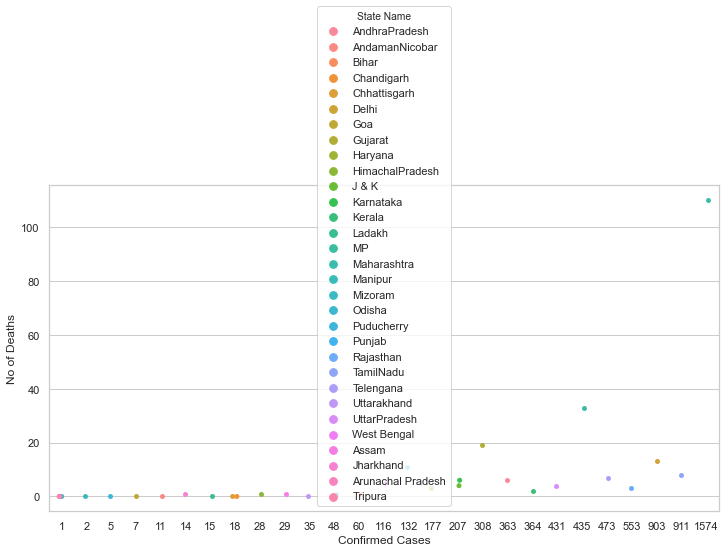

In [21]:
sns.set(style='whitegrid',color_codes=True)
plt.subplots(figsize=(12,6))

sns.stripplot(x='Confirmed Cases',
              y='No of Deaths',data=cases,hue='State Name')
plt.show()

In [26]:
cases.shape

(31, 4)

In [27]:
cases.describe()

,Confirmed Cases,Cured/Discharged/Migrated,No of Deaths
count,31.000000,31.000000,31.000000
mean,240.225806,20.741935,7.709677
std,353.809243,39.343757,20.220771
min,1.000000,0.000000,0.000000
25%,14.500000,0.500000,0.000000
50%,60.000000,6.000000,1.000000
75%,363.500000,27.000000,6.000000
max,1574.000000,188.000000,110.000000


In [40]:
# cases['State Name'].value_counts()

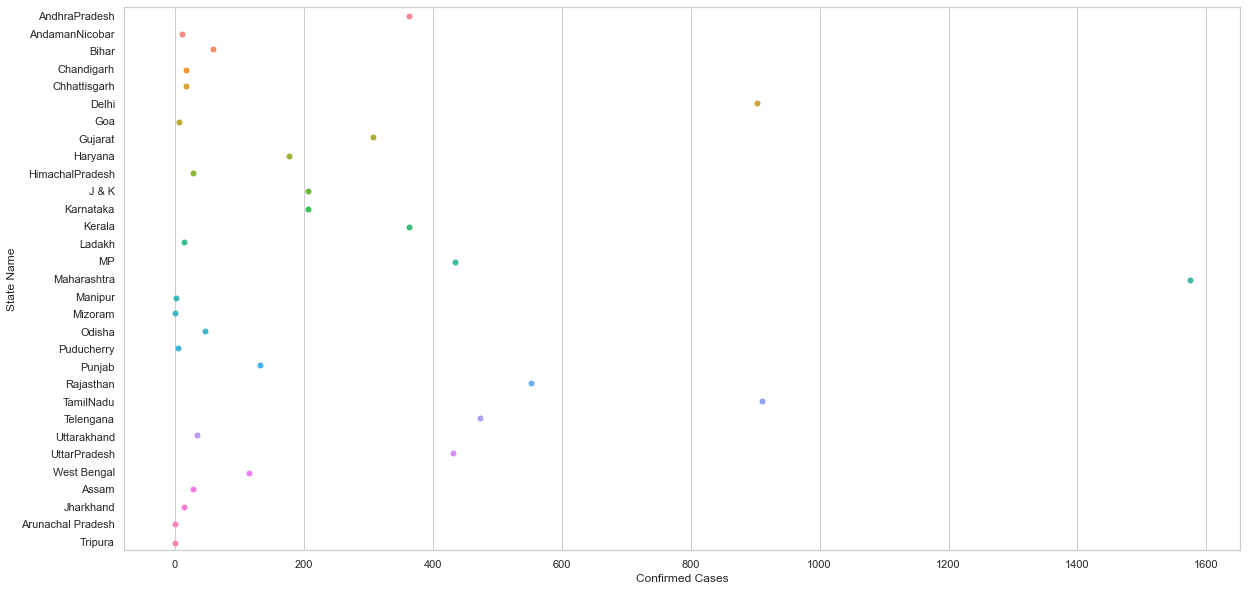

In [35]:
sns.set(style='whitegrid',color_codes=True)
plt.subplots(figsize=(20,10))

sns.stripplot('Confirmed Cases',
              'State Name',data=cases,size=6)
plt.show()

In [31]:
cases.columns

Index(['State Name', 'Confirmed Cases', 'Cured/Discharged/Migrated',
       'No of Deaths'],
      dtype='object')

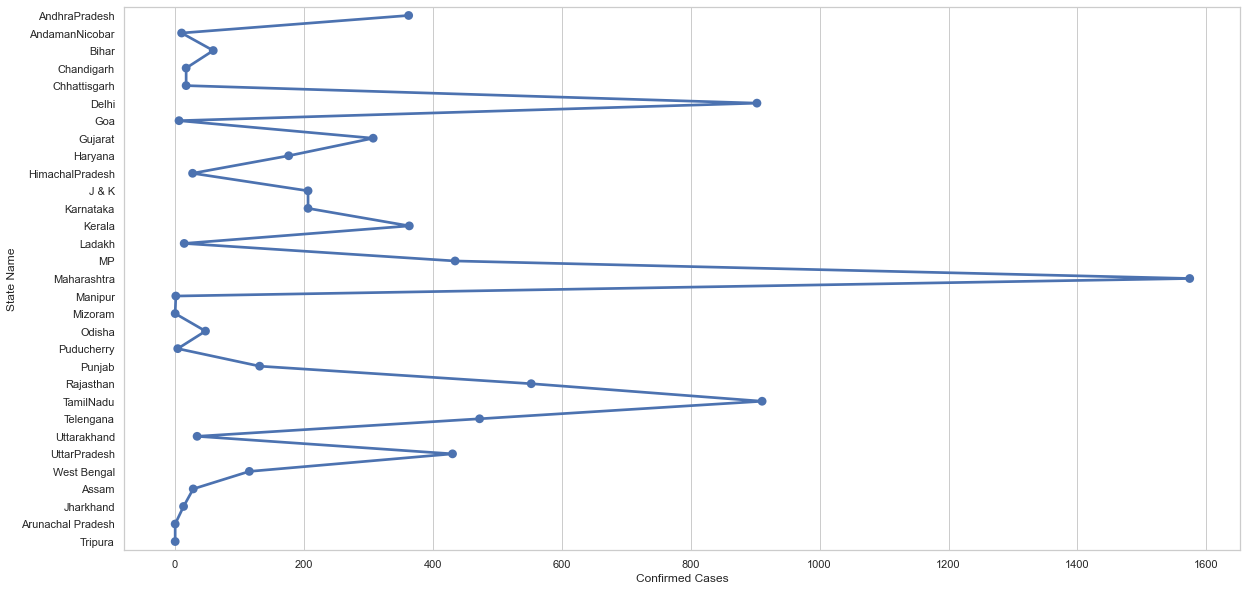

In [36]:
plt.subplots(figsize=(20,10))
sns.pointplot(x='Confirmed Cases',
              y='State Name',data=cases)
plt.show()

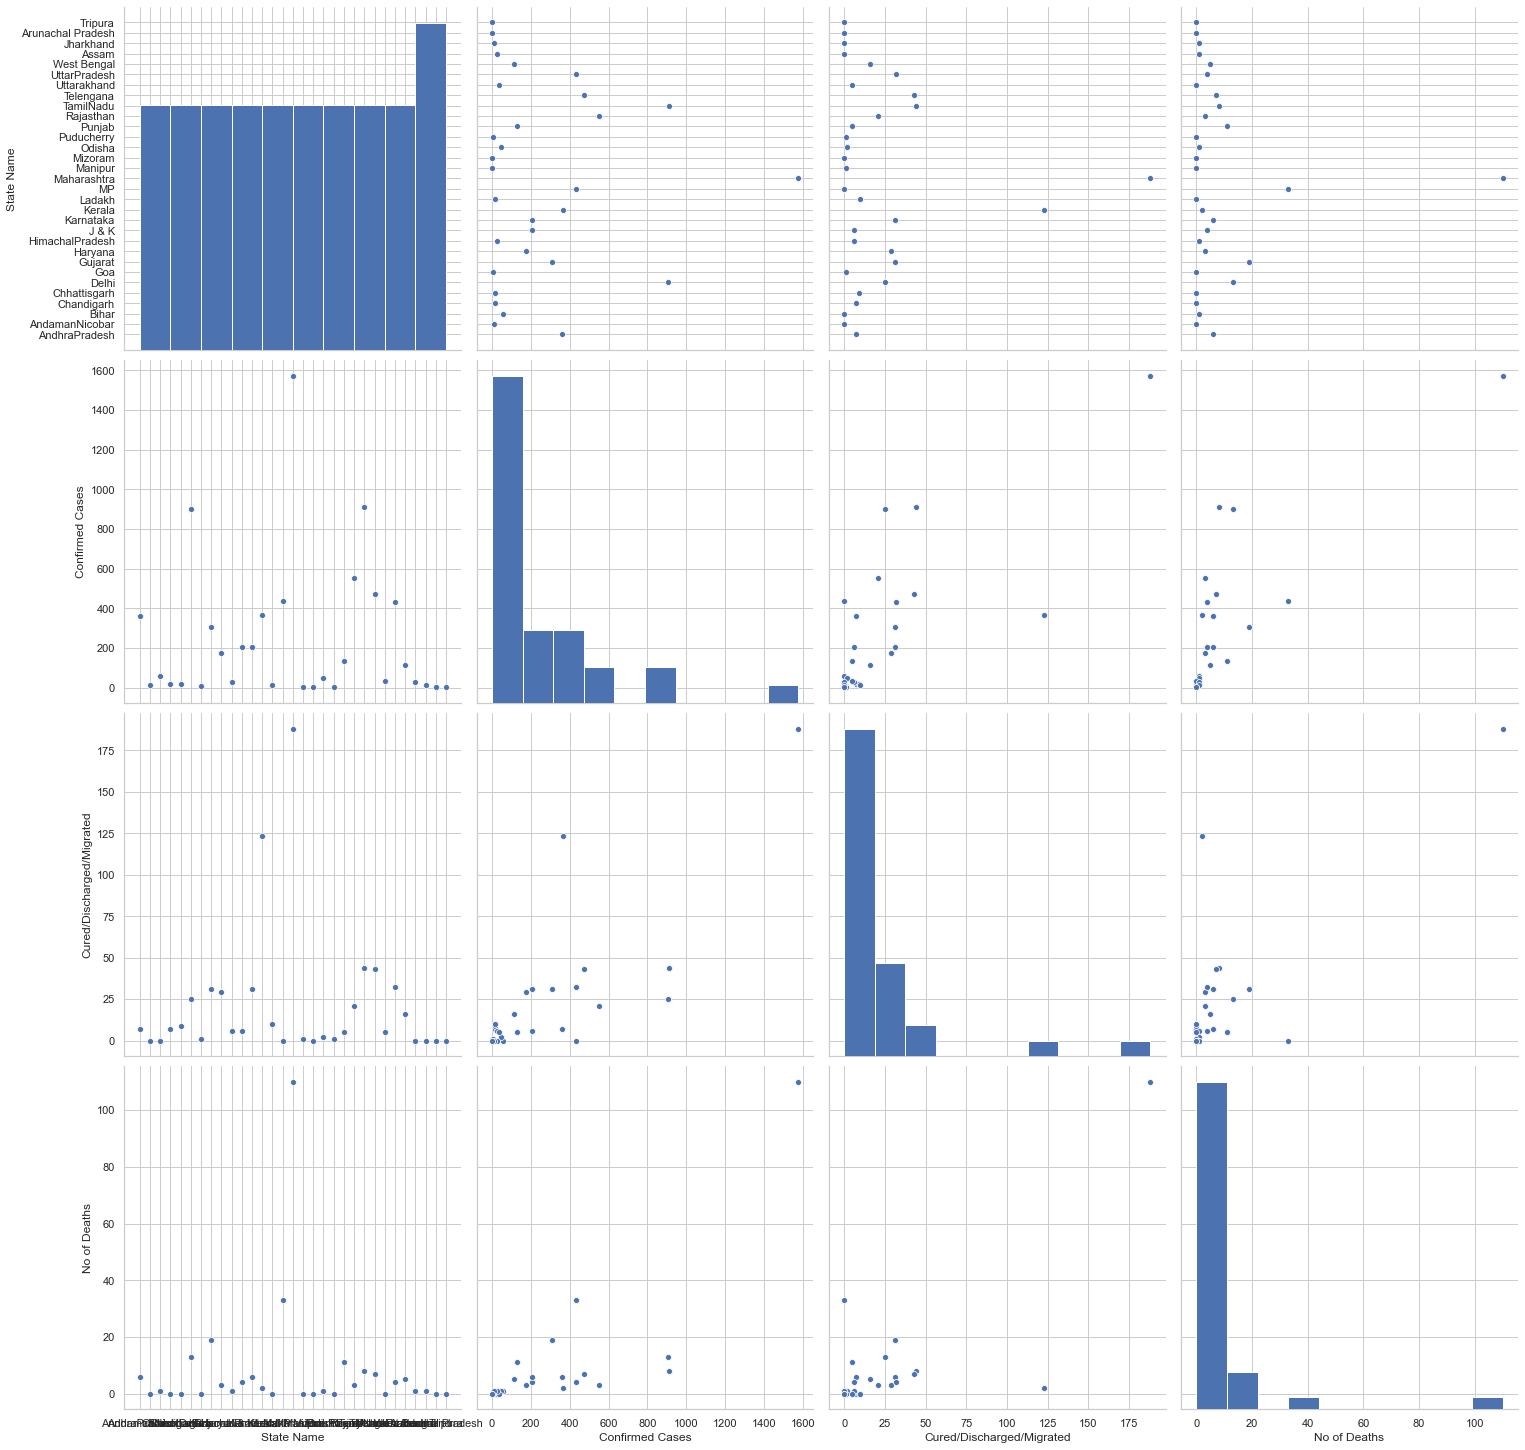

In [39]:
sns.pairplot(cases,height=5,
            vars = ['State Name','Confirmed Cases','Cured/Discharged/Migrated','No of Deaths'])
plt.show()

In [41]:
 samp_data = cases[['State Name','Confirmed Cases','Cured/Discharged/Migrated','No of Deaths']]

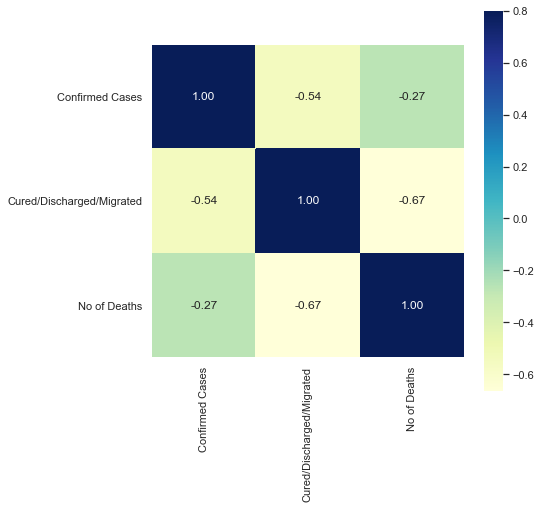

In [48]:
samp_data = samp_data.corr()

plt.subplots(figsize=(7,7))

sns.heatmap(samp_data,vmax=.8,square=True,annot=True,fmt='.2f',cmap='YlGnBu')

plt.show()

In [ ]:
##### Confirmed Corono Cases in INDIA

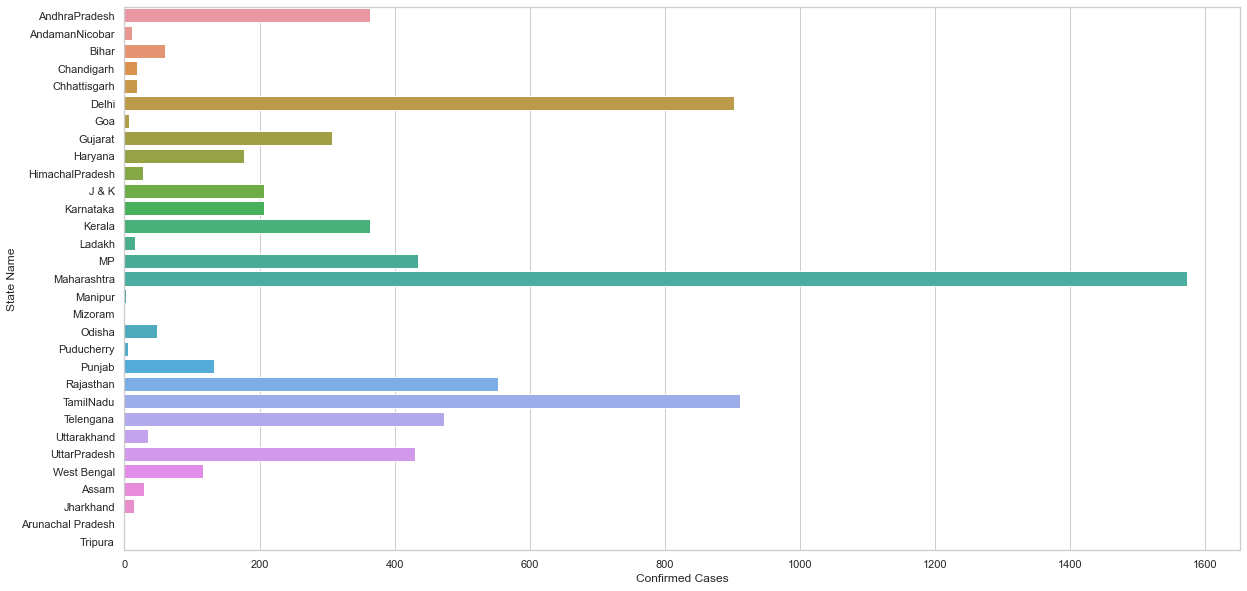

In [49]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Confirmed Cases',
              y='State Name',data=cases)
plt.show()

In [50]:
##### Corona Death cases in INDIA

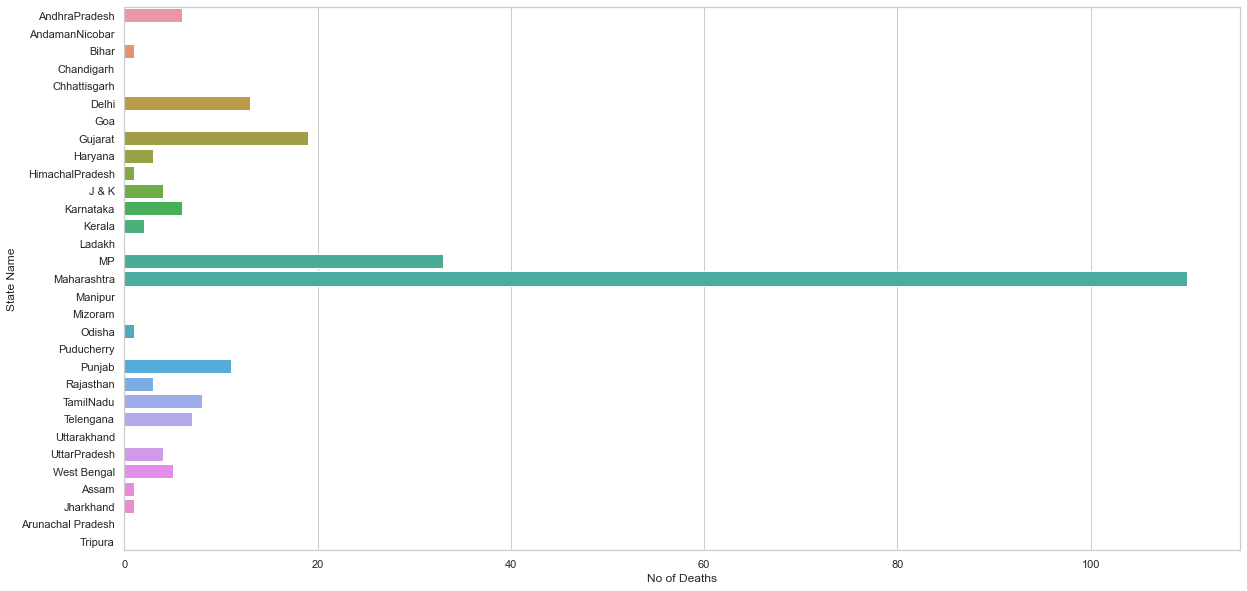

In [46]:
sns.set_style('whitegrid')
plt.subplots(figsize=(20,10))
sns.barplot(x='No of Deaths',
              y='State Name',data=cases)
plt.show()